In [48]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [2]:
from scipy.cluster.vq import whiten, kmeans2

In [3]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': '6343e2401b274e4b9d3233b7291115e5' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [4]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/496/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/496/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/496'}},
  'code': None,
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/6/63/Rio_Ave_FC.svg',
  'name': 'FC Rio Ave',
  'shortName': 'Rio Ave',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/503/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/503/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/503'}},
  'code': 'FCP',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/e/ed/FC_Porto_1922-2005.svg',
  'name': 'FC Porto',
  'shortName': 'Porto',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/583/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/583/players'},
   'self': {'href

In [46]:
for team in teams:
    players = call_api(team['_links']['players']['href'], 'players')
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    lose = 0
    goals = 0
    goals_score = 0
    goals_miss = 0
    for f in fixtures:
        goals_score = 0
        goals_miss = 0
        if team['name'] == f['homeTeamName']:
            goals += f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0
            goals_score += f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0
            goals_miss += f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0
        else:
            goals += f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0
            goals_miss += f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0
            goals_score += f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0
        if (goals_score - goals_miss) < 0: lose += 1
        
    print('Team "{}", {} players, {} goals, {} lose.'.format(team['name'], len(players), goals, lose))
#     print(lose)
    team['players'] = players
    team['goals'] = goals
    team['lose'] = lose

Team "FC Rio Ave", 23 players, 31 goals, 9 lose.
Team "FC Porto", 26 players, 76 goals, 3 lose.
Team "Moreirense FC", 25 players, 18 goals, 12 lose.
Team "FC Paços de Ferreira", 31 players, 25 goals, 12 lose.
Team "Sporting CP", 27 players, 55 goals, 4 lose.
Team "Maritimo Funchal", 28 players, 18 goals, 9 lose.
Team "CD Tondela", 26 players, 27 goals, 12 lose.
Team "SL Benfica", 24 players, 60 goals, 7 lose.
Team "Boavista Porto FC", 29 players, 23 goals, 11 lose.
Team "FC Arouca", 21 players, 0 goals, 0 lose.
Team "Vitoria Setubal", 28 players, 26 goals, 10 lose.
Team "C.F. Os Belenenses", 25 players, 21 goals, 11 lose.
Team "Vitoria Guimaraes", 30 players, 30 goals, 12 lose.
Team "Sporting Braga", 24 players, 48 goals, 6 lose.
Team "GD Estoril Praia", 29 players, 23 goals, 14 lose.
Team "Feirense", 29 players, 20 goals, 15 lose.
Team "Nacional Funchal", 18 players, 0 goals, 0 lose.
Team "G.D. Chaves", 22 players, 29 goals, 8 lose.


In [49]:
team_for_pd = []
for team in teams:
#     print(team)
#     print('--------------------')
    if team['players']:
        team_for_pd.append({
            'name': team['name'], 
            'players': len(team['players']), 
            'goals': team['goals'], 
            'lose': team['lose'],
            'Cost': random.randint(10000, 100000)   #  team['squadMarketValue']
        })
team_for_pd

[{'Cost': 36076, 'goals': 31, 'lose': 9, 'name': 'FC Rio Ave', 'players': 23},
 {'Cost': 58632, 'goals': 76, 'lose': 3, 'name': 'FC Porto', 'players': 26},
 {'Cost': 15464,
  'goals': 18,
  'lose': 12,
  'name': 'Moreirense FC',
  'players': 25},
 {'Cost': 43714,
  'goals': 25,
  'lose': 12,
  'name': 'FC Paços de Ferreira',
  'players': 31},
 {'Cost': 55295, 'goals': 55, 'lose': 4, 'name': 'Sporting CP', 'players': 27},
 {'Cost': 77159,
  'goals': 18,
  'lose': 9,
  'name': 'Maritimo Funchal',
  'players': 28},
 {'Cost': 41628, 'goals': 27, 'lose': 12, 'name': 'CD Tondela', 'players': 26},
 {'Cost': 98345, 'goals': 60, 'lose': 7, 'name': 'SL Benfica', 'players': 24},
 {'Cost': 90887,
  'goals': 23,
  'lose': 11,
  'name': 'Boavista Porto FC',
  'players': 29},
 {'Cost': 83555, 'goals': 0, 'lose': 0, 'name': 'FC Arouca', 'players': 21},
 {'Cost': 55115,
  'goals': 26,
  'lose': 10,
  'name': 'Vitoria Setubal',
  'players': 28},
 {'Cost': 79000,
  'goals': 21,
  'lose': 11,
  'name': 'C

In [50]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,Cost,goals,lose,name,players
0,36076,31,9,FC Rio Ave,23
1,58632,76,3,FC Porto,26
2,15464,18,12,Moreirense FC,25
3,43714,25,12,FC Paços de Ferreira,31
4,55295,55,4,Sporting CP,27
5,77159,18,9,Maritimo Funchal,28
6,41628,27,12,CD Tondela,26
7,98345,60,7,SL Benfica,24
8,90887,23,11,Boavista Porto FC,29
9,83555,0,0,FC Arouca,21


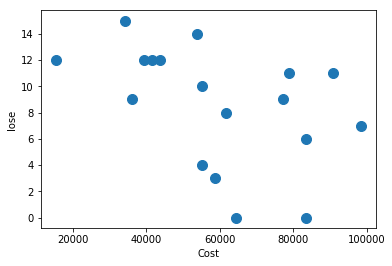

In [52]:
teams_pd.plot.scatter(x='Cost', y='lose', s=100)

In [54]:
del teams_pd['name']
del teams_pd['players']
del teams_pd['goals']
teams_pd

,Cost,lose
0,36076,9
1,58632,3
2,15464,12
3,43714,12
4,55295,4
5,77159,9
6,41628,12
7,98345,7
8,90887,11
9,83555,0


In [55]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 1.65672704,  2.06996007],
       [ 2.69257178,  0.68998669],
       [ 0.71015708,  2.75994676],
       [ 2.00748879,  2.75994676],
       [ 2.53932591,  0.91998225],
       [ 3.54339177,  2.06996007],
       [ 1.9116929 ,  2.75994676],
       [ 4.51632166,  1.60996894],
       [ 4.17382609,  2.5299512 ],
       [ 3.83711685,  0.        ],
       [ 2.53105972,  2.29995563],
       [ 3.62793646,  2.5299512 ],
       [ 1.81438154,  2.75994676],
       [ 3.83229491,  1.37997338],
       [ 2.47191058,  3.21993789],
       [ 1.56814109,  3.44993345],
       [ 2.95539052,  0.        ],
       [ 2.82878013,  1.83996451]])

In [56]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 3.7537585 ,  1.99329488],
        [ 3.00610126,  0.40249224],
        [ 1.83394484,  2.75994676]]),
 array([2, 1, 2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 1, 0], dtype=int32))

In [57]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['b',
 'g',
 'b',
 'b',
 'g',
 'r',
 'b',
 'r',
 'r',
 'g',
 'b',
 'r',
 'b',
 'r',
 'b',
 'b',
 'g',
 'r']

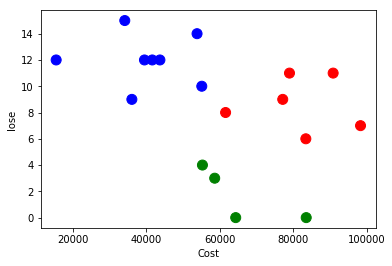

In [58]:
teams_pd.plot.scatter(x='Cost', y='lose', c=colors, s=100)

In [ ]:
Используя kmeans сделать кластеризацию футбольных команд по стоимости и количеству проигрышей, 
результат отобразить в виде точечного графика для случая из 3 и из 5 кластеров. Если стоимость 
команд не указана, то сгенерировать случайные стоимости для команд.

In [59]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[ 2.68689261,  1.14997782],
        [ 3.93875418,  2.02396096],
        [ 1.13914909,  3.10494011],
        [ 2.06554343,  2.64494898],
        [ 3.39625368,  0.        ]]),
 array([3, 0, 2, 3, 0, 1, 3, 1, 1, 4, 3, 1, 3, 1, 3, 2, 4, 0], dtype=int32))

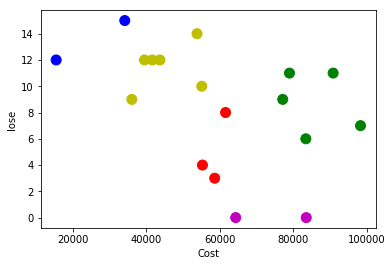

In [61]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
# colors
teams_pd.plot.scatter(x='Cost', y='lose', c=colors, s=100)